In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=15).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/데이터시각화/과제4

/content/drive/MyDrive/데이터시각화/과제4


In [ ]:
csv1 = pd.read_csv('서울시 부동산 실거래가 정보.csv', encoding='cp949')

In [ ]:
csv1.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2022,11590.0,동작구,10700.0,사당동,1.0,대지,1003.0,35.0,현대빌라(1003-35),...,79500.0,84.82,47.00,2.0,NaN,NaN,1997.0,연립다세대,중개거래,서울 동작구 서울 서초구
1,2022,11110.0,종로구,13700.0,낙원동,1.0,대지,58.0,1.0,종로오피스텔,...,13000.0,25.20,32.58,6.0,NaN,NaN,1994.0,오피스텔,직거래,NaN
2,2022,11500.0,강서구,10500.0,마곡동,1.0,대지,773.0,3.0,힐스테이트에코동익,...,22500.0,24.57,35.00,14.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 강서구
3,2022,11710.0,송파구,10800.0,문정동,1.0,대지,652.0,2.0,문정 오벨리스크,...,27800.0,27.66,40.94,14.0,NaN,NaN,2018.0,오피스텔,중개거래,서울 송파구
4,2022,11290.0,성북구,13300.0,정릉동,1.0,대지,376.0,51.0,정릉쎈스빌(376-51),...,17000.0,44.77,28.98,5.0,NaN,NaN,2012.0,연립다세대,직거래,NaN


In [ ]:
len(csv1)

47246

In [ ]:
csv1_1 = csv1[csv1['건물용도'] == '아파트']
csv1_2 = csv1[csv1['건물용도'] == '오피스텔']

In [ ]:
len(csv1_1)
print('\n')
len(csv1_2)

8672

10787

In [ ]:
csv1_11 = csv1_1[csv1_1['건축년도'] < 2000]
csv1_12 = csv1_1[(2000 <= csv1_1['건축년도']) & (csv1_1['건축년도'] < 2010)]
csv1_13 = csv1_1[csv1_1['건축년도'] >= 2010]

In [ ]:
csv1_21 = csv1_2[csv1_2['건축년도'] < 2000]
csv1_22 = csv1_2[(2000 <= csv1_2['건축년도']) & (csv1_2['건축년도'] < 2010)]
csv1_23 = csv1_2[csv1_2['건축년도'] >= 2010]

Text(0.22664477370654773, 0.44568166503852025, '14.97%')

Text(0.4906664056634153, 0.09615861039628644, '13.89%')

Text(0.36343268445610366, -0.34338998801512866, '16.37%')

Text(0.33319951764438255, -1.1700196460412928, '2.40%')

Text(-0.14087337939168584, -0.47974440171696237, '13.82%')

Text(-0.4679758255886871, 0.17606426856289348, '38.55%')

Text(0.5, 1.0, '서울특별시 2022년에 계약된 아파트와 오피스텔의 비율')

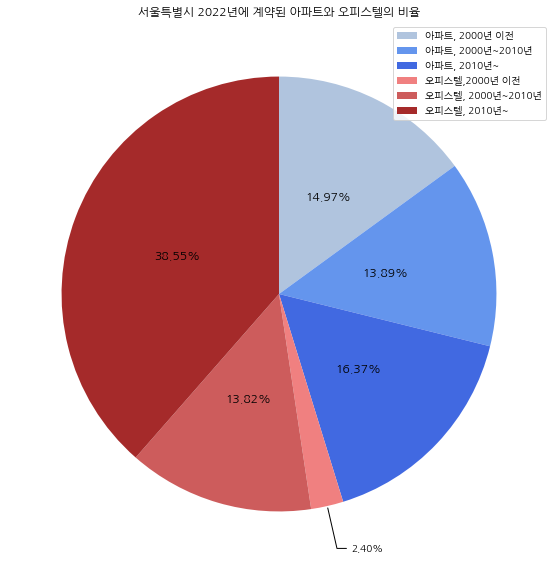

In [ ]:
labels = ['아파트, 2000년 이전', '아파트, 2000년~2010년', '아파트, 2010년~', '오피스텔,2000년 이전', '오피스텔, 2000년~2010년', '오피스텔, 2010년~']
sizes = [len(csv1_11)/len(csv1_1), len(csv1_12)/len(csv1_1),len(csv1_13)/len(csv1_1), len(csv1_21)/len(csv1_2), len(csv1_22)/len(csv1_2), len(csv1_23)/len(csv1_2)]
colors = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'lightcoral', 'indianred', 'brown']

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

frequency = [len(csv1_11), len(csv1_12), len(csv1_13), len(csv1_21), len(csv1_22), len(csv1_23)]

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       textprops={'size':20}
       )

total = np.sum(frequency)

threshold = 5 #상한선 비율 = 5%
sum_pct = 0 #퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0)
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 =  ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이

    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'

    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표

        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ##
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)


plt.title('서울특별시 2022년에 계약된 아파트와 오피스텔의 비율')
plt.legend(pie[0],labels,loc='upper right') ## 범례
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '서울특별시 2022년에 계약된 아파트와 오피스텔의 비율\n\n건물용도(건설연도)')

([<matplotlib.patches.Wedge at 0x7f297dbd0f50>,
 [Text(-0.5532823721833949, 0.9507253108185958, '아파트(~2000)'),
  Text(-1.0995738400520303, 0.030616503282250126, '아파트(2000~2010)'),
  Text(-0.5596005987230164, -0.9470201528525366, '아파트(2010~)'),
  Text(0.12118459730238709, -1.093304300447345, '오피스텔(~2000)'),
  Text(0.5930154379165096, -0.9264624603256683, '오피스텔(2000~2010)'),
  Text(0.9756129619773743, 0.5081135192274798, '오피스텔(2010~)')],
 [Text(-0.3017903848273063, 0.5185774422646885, '16.8%'),
  Text(-0.5997675491192892, 0.01669991088122734, '15.6%'),
  Text(-0.30523669021255434, -0.5165564470104744, '18.3%'),
  Text(0.06610068943766567, -0.5963478002440062, '2.2%'),
  Text(0.32346296613627795, -0.5053431601776371, '12.4%'),
  Text(0.5321525247149314, 0.27715282866953445, '34.7%')])

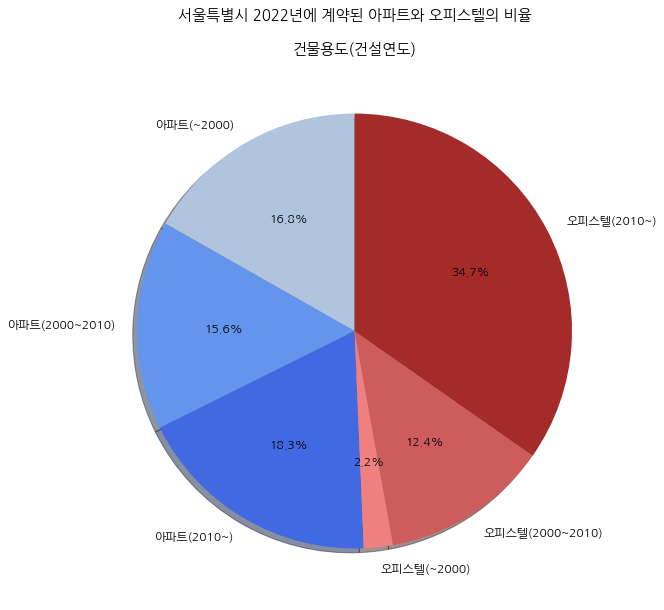

In [ ]:
labels = ['아파트(~2000)', '아파트(2000~2010)', '아파트(2010~)', '오피스텔(~2000)', '오피스텔(2000~2010)', '오피스텔(2010~)']
sizes = [len(csv1_11)/len(csv1_1), len(csv1_12)/len(csv1_1),len(csv1_13)/len(csv1_1), len(csv1_21)/len(csv1_2), len(csv1_22)/len(csv1_2), len(csv1_23)/len(csv1_2)]
colors = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'lightcoral', 'indianred', 'brown']
plt.figure(figsize=(10,10))
plt.title('서울특별시 2022년에 계약된 아파트와 오피스텔의 비율' + '\n' + '\n' + '건물용도(건설연도)', fontsize=15)
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'size':12})
plt.show()

In [ ]:
csv1_11
len(csv1_11)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
77,2022,11470.0,양천구,10100.0,신정동,1.0,대지,312.0,0.0,목동신시가지9,...,139500.0,71.37,0.0,8.0,NaN,NaN,1987.0,아파트,중개거래,서울 양천구
96,2022,11740.0,강동구,10100.0,명일동,1.0,대지,44.0,0.0,신동아,...,110000.0,81.07,0.0,13.0,NaN,NaN,1986.0,아파트,중개거래,서울 강동구
131,2022,11740.0,강동구,10900.0,천호동,1.0,대지,563.0,0.0,동아코아아파트,...,60500.0,57.33,0.0,19.0,NaN,NaN,1997.0,아파트,중개거래,서울 강동구
211,2022,11410.0,서대문구,11100.0,홍제동,1.0,대지,157.0,68.0,광산,...,50500.0,70.64,0.0,3.0,NaN,NaN,1973.0,아파트,중개거래,서울 서대문구
247,2022,11440.0,마포구,10400.0,도화동,1.0,대지,550.0,0.0,삼성,...,132000.0,114.74,0.0,11.0,NaN,NaN,1997.0,아파트,직거래,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44585,2022,11590.0,동작구,10700.0,사당동,1.0,대지,105.0,0.0,극동(105),...,125000.0,110.14,0.0,12.0,NaN,NaN,1993.0,아파트,중개거래,서울 동작구
44605,2022,11440.0,마포구,10100.0,아현동,1.0,대지,371.0,1.0,예미원,...,74000.0,66.24,0.0,6.0,NaN,NaN,1970.0,아파트,중개거래,서울 서대문구
44609,2022,11530.0,구로구,10200.0,구로동,1.0,대지,794.0,17.0,(794-17),...,21000.0,38.96,0.0,5.0,NaN,NaN,1997.0,아파트,중개거래,서울 구로구
44610,2022,11320.0,도봉구,10700.0,창동,1.0,대지,347.0,0.0,창동주공3단지(해등마을),...,75500.0,49.94,0.0,11.0,NaN,NaN,1990.0,아파트,중개거래,서울 도봉구


2871

In [ ]:
csv1_11['구분'] = '2000년 이전'
csv1_12['구분'] = '2000년~2010년'
csv1_13['구분'] = '2010년 이후'
csv1_21['구분'] = '2000년 이전'
csv1_22['구분'] = '2000년~2010년'
csv1_23['구분'] = '2010년 이후'

In [ ]:
csv1_111 = pd.concat([csv1_11, csv1_12, csv1_13])
csv1_111

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,구분
77,2022,11470.0,양천구,10100.0,신정동,1.0,대지,312.0,0.0,목동신시가지9,...,71.37,0.0,8.0,NaN,NaN,1987.0,아파트,중개거래,서울 양천구,2000년 이전
96,2022,11740.0,강동구,10100.0,명일동,1.0,대지,44.0,0.0,신동아,...,81.07,0.0,13.0,NaN,NaN,1986.0,아파트,중개거래,서울 강동구,2000년 이전
131,2022,11740.0,강동구,10900.0,천호동,1.0,대지,563.0,0.0,동아코아아파트,...,57.33,0.0,19.0,NaN,NaN,1997.0,아파트,중개거래,서울 강동구,2000년 이전
211,2022,11410.0,서대문구,11100.0,홍제동,1.0,대지,157.0,68.0,광산,...,70.64,0.0,3.0,NaN,NaN,1973.0,아파트,중개거래,서울 서대문구,2000년 이전
247,2022,11440.0,마포구,10400.0,도화동,1.0,대지,550.0,0.0,삼성,...,114.74,0.0,11.0,NaN,NaN,1997.0,아파트,직거래,NaN,2000년 이전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44574,2022,11380.0,은평구,10700.0,응암동,1.0,대지,762.0,0.0,녹번역센트레빌,...,84.90,0.0,14.0,NaN,NaN,2013.0,아파트,중개거래,서울 은평구,2010년 이후
44580,2022,11200.0,성동구,10500.0,마장동,1.0,대지,834.0,0.0,삼성홈타운,...,18.06,0.0,2.0,NaN,NaN,2015.0,아파트,중개거래,서울 성동구,2010년 이후
44618,2022,11140.0,중구,15400.0,오장동,1.0,대지,145.0,1.0,오렌지카운티을지로,...,14.37,0.0,15.0,NaN,20220203.0,2020.0,아파트,직거래,NaN,2010년 이후
44619,2022,11140.0,중구,15400.0,오장동,1.0,대지,145.0,1.0,오렌지카운티을지로,...,14.37,0.0,14.0,NaN,20220121.0,2020.0,아파트,직거래,NaN,2010년 이후


In [ ]:
csv1_222 = pd.concat([csv1_21, csv1_22, csv1_23])
csv1_222

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,구분
1,2022,11110.0,종로구,13700.0,낙원동,1.0,대지,58.0,1.0,종로오피스텔,...,25.20,32.58,6.0,NaN,NaN,1994.0,오피스텔,직거래,NaN,2000년 이전
146,2022,11680.0,강남구,10100.0,역삼동,1.0,대지,707.0,1.0,두꺼비빌딩,...,25.92,36.45,11.0,NaN,NaN,1990.0,오피스텔,직거래,NaN,2000년 이전
242,2022,11740.0,강동구,10900.0,천호동,1.0,대지,449.0,49.0,힐탑프라자,...,20.48,24.26,7.0,NaN,NaN,1994.0,오피스텔,중개거래,서울 강동구,2000년 이전
362,2022,11650.0,서초구,10200.0,양재동,1.0,대지,275.0,1.0,삼호물산빌딩(275-1),...,27.36,36.53,19.0,NaN,NaN,1991.0,오피스텔,중개거래,서울 서초구,2000년 이전
481,2022,11305.0,강북구,10200.0,번동,1.0,대지,446.0,13.0,가든타워오피스텔,...,36.90,51.73,11.0,NaN,NaN,1991.0,오피스텔,중개거래,서울 강북구,2000년 이전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44599,2022,11680.0,강남구,10100.0,역삼동,1.0,대지,837.0,18.0,강남역 서희스타힐스 오피스텔,...,31.50,48.18,12.0,NaN,NaN,2012.0,오피스텔,중개거래,서울 강남구,2010년 이후
44600,2022,11560.0,영등포구,12800.0,양평동4가,1.0,대지,1.0,9.0,URBAN52,...,29.65,38.67,11.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,2010년 이후
44614,2022,11530.0,구로구,10200.0,구로동,1.0,대지,43.0,1.0,신도림 로제리움,...,20.09,30.05,12.0,NaN,NaN,2012.0,오피스텔,중개거래,서울 구로구,2010년 이후
44626,2022,11620.0,관악구,10200.0,신림동,1.0,대지,1568.0,5.0,더위일관악파크뷰,...,17.30,25.65,9.0,NaN,NaN,2021.0,오피스텔,직거래,NaN,2010년 이후


In [ ]:
len(csv1_11)
print("\n")
len(csv1_12)
print("\n")
len(csv1_13)
print("\n")
len(csv1_21)
print("\n")
len(csv1_22)
print("\n")
len(csv1_23)
print("\n")

2871

2663

3138

461

2649

7390

<Figure size 864x576 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7f297dad47d0>,
 [Text(0, 0, '2000년 이전'), Text(0, 0, '2000년~2010년'), Text(0, 0, '2010년 이후')])

Text(0.5, 0, '건설연도')

Text(0, 0.5, '거래량(건)')

Text(0.5, 1.0, '서울특별시 2022년 체결된 아파트와 오피스텔의 거래량')

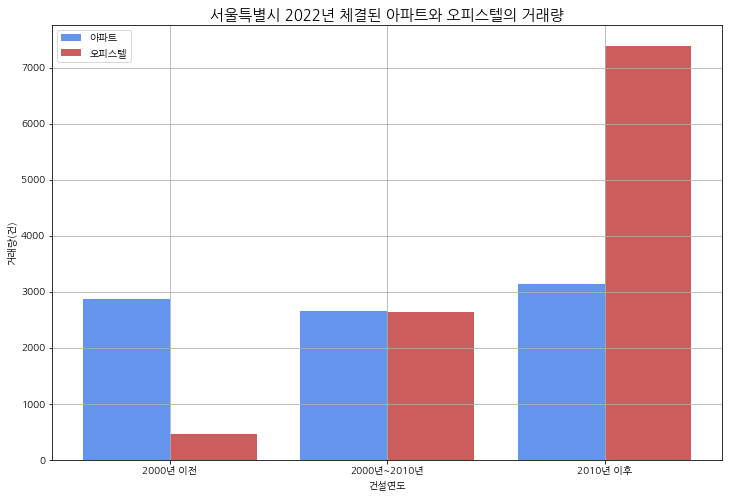

In [ ]:
x = np.arange(0, 3)

bar_width = 0.4

plt.figure(figsize=(12, 8))
plt.bar(x, [2871, 2663, 3138], color='cornflowerblue', width = bar_width, label='아파트')
plt.bar(x + bar_width, [461, 2649, 7390], color='indianred', width = bar_width, label='오피스텔')


plt.xticks(x + bar_width / 2, ['2000년 이전', '2000년~2010년', '2010년 이후'])
plt.xlabel('건설연도')
plt.ylabel('거래량(건)')
plt.legend()
plt.grid()
plt.title('서울특별시 2022년 체결된 아파트와 오피스텔의 거래량', fontsize=15)
plt.show()

In [ ]:
from matplotlib import font_manager
font_manager._rebuild()
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

# set style
sns.set_style("dark")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo Eco /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumBarunpen /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
Nanum Pen Script /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothic Eco /usr/share/fonts

In [ ]:
csv1_gj = csv1[csv1['자치구명'] == '광진구']
len(csv1_gj)

1228

In [ ]:
csv1_hy = csv1[csv1['법정동명'] == '화양동']
csv1_hy = csv1_hy[(csv1_hy['건물용도'] == '오피스텔') | (csv1_hy['건물용도'] == '아파트')]
len(csv1_hy)
csv1_hy

83

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
97,2022,11215.0,광진구,10700.0,화양동,1.0,대지,93.0,3.0,캠퍼니안,...,23800.0,42.42,55.82,7.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 광진구
127,2022,11215.0,광진구,10700.0,화양동,1.0,대지,113.0,1.0,광진코지웰,...,13000.0,14.73,0.00,8.0,NaN,NaN,2014.0,아파트,중개거래,서울 광진구
821,2022,11215.0,광진구,10700.0,화양동,1.0,대지,193.0,0.0,하이뷰오피스텔,...,25000.0,18.57,31.79,10.0,NaN,NaN,2020.0,오피스텔,직거래,NaN
981,2022,11215.0,광진구,10700.0,화양동,1.0,대지,21.0,23.0,케이타워 오피스텔 A,...,14500.0,19.78,27.39,11.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 광진구
1194,2022,11215.0,광진구,10700.0,화양동,1.0,대지,94.0,9.0,화양동 프라하임,...,47692.0,26.85,37.05,9.0,NaN,NaN,2022.0,오피스텔,직거래,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42075,2022,11215.0,광진구,10700.0,화양동,1.0,대지,21.0,22.0,케이타워 오피스텔 B,...,13000.0,18.85,27.07,6.0,NaN,20220318.0,2013.0,오피스텔,중개거래,서울 광진구
42132,2022,11215.0,광진구,10700.0,화양동,1.0,대지,111.0,12.0,NaN,...,27400.0,16.88,29.90,15.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구
42302,2022,11215.0,광진구,10700.0,화양동,1.0,대지,111.0,12.0,NaN,...,41700.0,22.47,39.53,20.0,NaN,NaN,2021.0,오피스텔,중개거래,서울 광진구
42834,2022,11215.0,광진구,10700.0,화양동,1.0,대지,21.0,20.0,광진캠퍼스시티,...,18900.0,16.08,26.41,20.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 광진구


In [ ]:
csv1_hy_o = csv1_hy[csv1_hy['건물용도'] == '오피스텔']
csv1_hy_a = csv1_hy[csv1_hy['건물용도'] == '아파트']
len(csv1_hy_o)

58

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

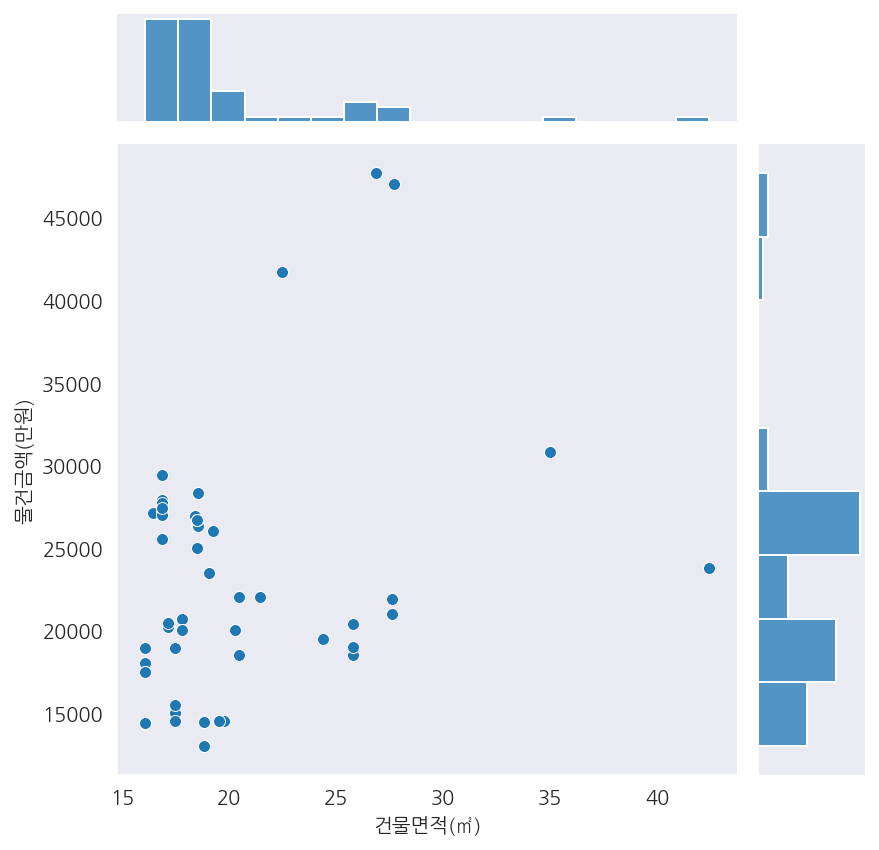

In [ ]:
plt.figure(figsize=(20,20))
sns.jointplot(x=csv1_hy_o['건물면적(㎡)'], y=csv1_hy_o['물건금액(만원)'], kind='scatter')

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, '건물 면적(㎡)')

(0.0, 100000.0)

Text(0, 0.5, '매매 가격(만원)')

Text(0.5, 1.0, '2022년 화양동 계약된 아파트와 오피스텔 건물 면적별 매매 가격 분포')

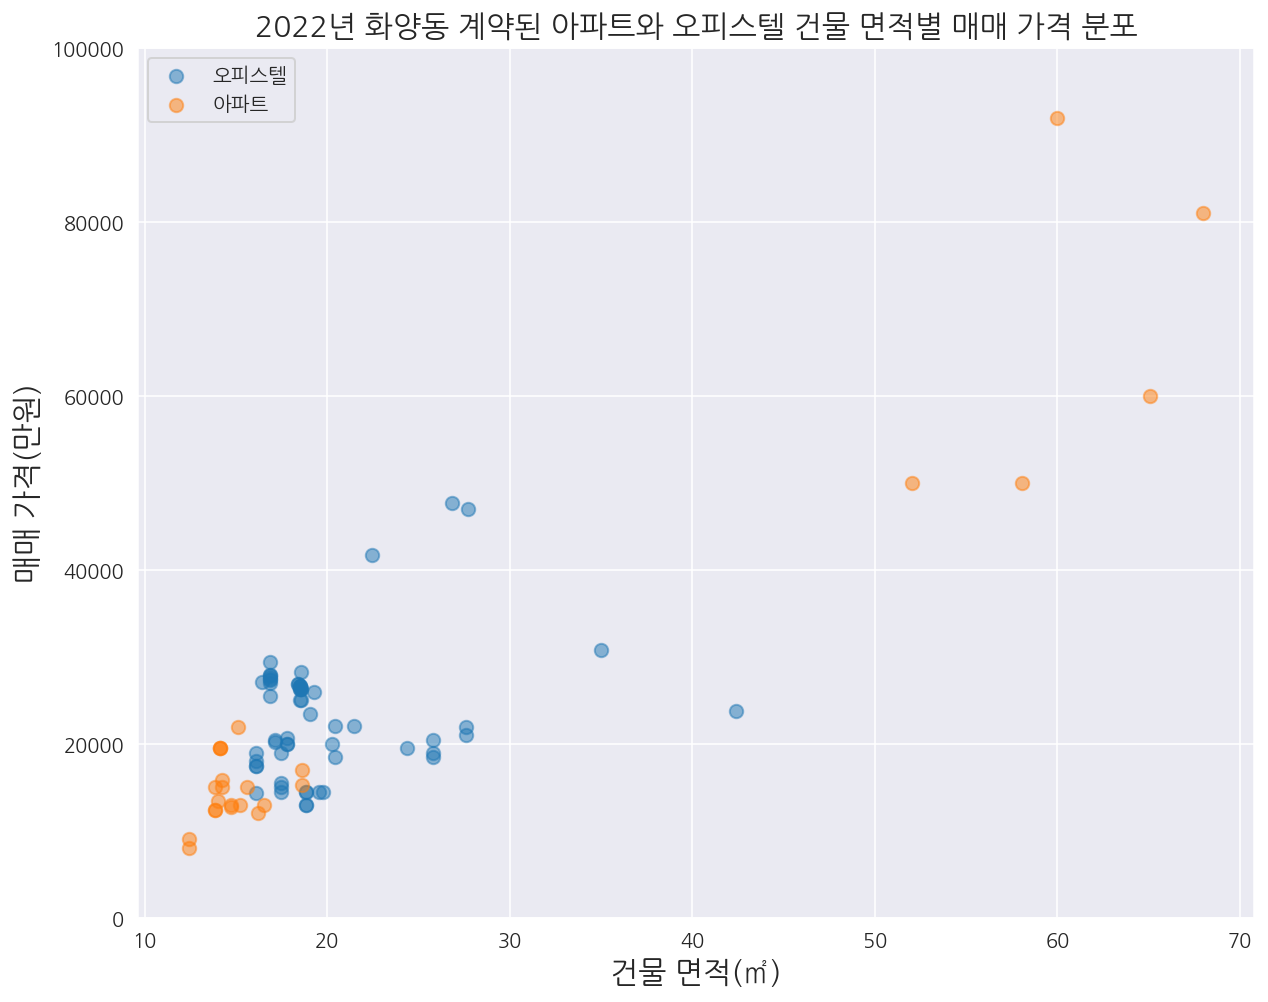

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(csv1_hy_o['건물면적(㎡)'], csv1_hy_o['물건금액(만원)'], label='오피스텔', s=45, alpha=0.5)
plt.scatter(csv1_hy_a['건물면적(㎡)'], csv1_hy_a['물건금액(만원)'], label='아파트', s=45, alpha=0.5)
plt.xlabel('건물 면적(㎡)', fontsize = 15)
#plt.xlim(0, 70)
plt.ylim(0, 100000)
plt.ylabel('매매 가격(만원)', fontsize = 15)
plt.title('2022년 화양동 계약된 아파트와 오피스텔 건물 면적별 매매 가격 분포', fontsize=15)
plt.grid()
plt.legend(loc='upper left')
plt.show()

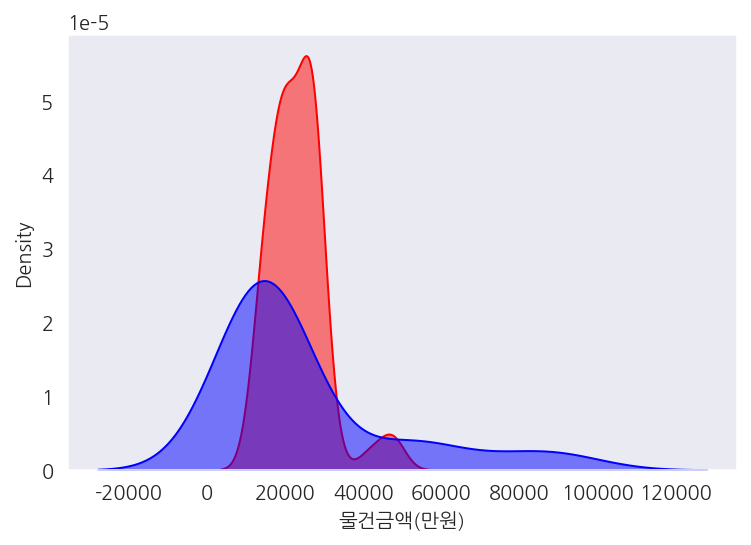

In [ ]:
sns.kdeplot(csv1_hy_o['물건금액(만원)'], shade=True, color='r', alpha = 0.5)
sns.kdeplot(csv1_hy_a['물건금액(만원)'], shade=True, color='b', alpha = 0.5)

In [ ]:
csv2 = pd.read_csv('서울시 부동산 전월세가 정보.csv', encoding='cp949')

In [ ]:
csv2_hy = csv2[csv2['건물명'] == '화양타워']

In [ ]:
csv2_hy

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
5452,2022,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,2.0,...,9000,0,화양타워,1999.0,아파트,NaN,NaN,NaN,NaN,NaN
6745,2022,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,2.0,...,8500,0,화양타워,1999.0,아파트,22.05~24.05,신규,NaN,0.0,NaN
7446,2022,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,2.0,...,500,40,화양타워,1999.0,아파트,NaN,NaN,NaN,NaN,NaN
7466,2022,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,2.0,...,2000,35,화양타워,1999.0,아파트,22.04~24.04,신규,NaN,0.0,0.0
8284,2022,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,10.0,...,35000,0,화양타워,1999.0,아파트,22.05~24.05,신규,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205848,2011,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,5.0,...,8000,0,화양타워,1999.0,오피스텔,NaN,NaN,NaN,NaN,NaN
206580,2011,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,4.0,...,9000,0,화양타워,1999.0,오피스텔,NaN,NaN,NaN,NaN,NaN
207518,2011,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,4.0,...,8000,20,화양타워,1999.0,오피스텔,NaN,NaN,NaN,NaN,NaN
208674,2011,11215,광진구,10700.0,화양동,1.0,대지,110.0,37.0,5.0,...,1000,60,화양타워,1999.0,오피스텔,NaN,NaN,NaN,NaN,NaN


In [ ]:
csv3 = pd.read_csv('서울 지하철 역 승하차 인원 정보.csv', encoding='cp949')

In [ ]:
csv3

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20221031,우이신설선,4.19민주묘지,4526,4586,20221103
1,20221031,경원선,가능,7366,7022,20221103
2,20221031,3호선,가락시장,9450,9348,20221103
3,20221031,8호선,가락시장,8050,8808,20221103
4,20221031,7호선,가산디지털단지,48261,48639,20221103
...,...,...,...,...,...,...
18780,20221001,경원선,회룡,10946,11295,20221004
18781,20221001,4호선,회현(남대문시장),20852,22196,20221004
18782,20221001,경의선,효창공원앞,2121,2224,20221004
18783,20221001,6호선,효창공원앞,5075,4350,20221004


In [ ]:
csv3_1 = csv3[csv3['역명'] == '어린이대공원(세종대)']

In [ ]:
csv3_2 = csv3[csv3['역명'] == '강남']
csv3_2['총합'] = csv3_2['승차총승객수'] + csv3_2['하차총승객수']

In [ ]:
csv3_1['총합'] = csv3_1['승차총승객수'] + csv3_1['하차총승객수']

Text(0.5, 1.0, '2022년 10월 어린이대공원역 지하철 탑승객 분포')

(0.0, 50000.0)

Text(0.5, 0, '탑승객 수(명)')

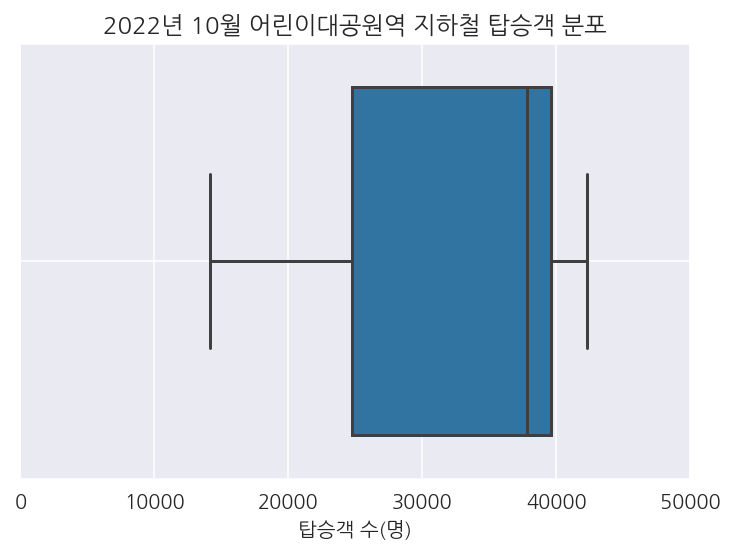

In [ ]:
sns.boxplot(x = csv3_1['총합'])
plt.title('2022년 10월 어린이대공원역 지하철 탑승객 분포')
plt.grid()
plt.xlim(0, 50000)
plt.xlabel('탑승객 수(명)')

In [ ]:
csv3_2 = csv3_2.sort_values(by=['사용일자'])
csv3_2.reset_index(inplace=True)
csv3_2.drop(['index'], axis=1, inplace=True)

In [ ]:
csv3_1 = csv3_1.sort_values(by=['사용일자'])

In [ ]:
csv3_1.reset_index(inplace=True)

In [ ]:
csv3_1.drop (['index'], axis =1, inplace=True)
csv3_1

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합
0,20221001,7호선,어린이대공원(세종대),12597,11829,20221004,24426
1,20221002,7호선,어린이대공원(세종대),8689,8743,20221005,17432
2,20221003,7호선,어린이대공원(세종대),6920,7245,20221006,14165
3,20221004,7호선,어린이대공원(세종대),19254,20340,20221007,39594
4,20221005,7호선,어린이대공원(세종대),19547,20572,20221008,40119
5,20221006,7호선,어린이대공원(세종대),19485,20201,20221009,39686
6,20221007,7호선,어린이대공원(세종대),18901,18857,20221010,37758
7,20221008,7호선,어린이대공원(세종대),12702,12321,20221011,25023
8,20221009,7호선,어린이대공원(세종대),9000,8836,20221012,17836
9,20221010,7호선,어린이대공원(세종대),8393,8782,20221013,17175


In [ ]:
len(csv3_1['사용일자'])
len(csv3_2)
csv3_2

31

31

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합
0,20221001,2호선,강남,58374,58877,20221004,117251
1,20221002,2호선,강남,36721,36591,20221005,73312
2,20221003,2호선,강남,30192,29053,20221006,59245
3,20221004,2호선,강남,84057,81384,20221007,165441
4,20221005,2호선,강남,86317,83360,20221008,169677
5,20221006,2호선,강남,87747,84654,20221009,172401
6,20221007,2호선,강남,93385,92171,20221010,185556
7,20221008,2호선,강남,60050,60129,20221011,120179
8,20221009,2호선,강남,34302,34233,20221012,68535
9,20221010,2호선,강남,35743,34488,20221013,70231


In [ ]:
date = ['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031']
num = np.arange(31)
plt.figure(figsize=(10,8))
plt.scatter(num, csv3_1['하차총승객수'], color = 'r', s=30, alpha=0.5, label = '어린이대공원')
plt.plot(num, csv3_1['하차총승객수'], color = 'r')
#plt.scatter(num, csv3_2['하차총승객수'], color = 'b', s=30, alpha=0.5, label = '강남')
#plt.plot(num, csv3_2['하차총승객수'], color = 'b')
plt.xlabel('날짜', fontsize = 15)

#plt.xlim(0, 70)
plt.ylim(0, 100000)
plt.ylabel('탑승객 수(명)', fontsize = 15)
plt.xticks(num, labels = date, rotation = 45)
plt.fill_between(x=[1:3], y= [1:3], alpha=0.5)
plt.title('2022년 10월 어린이대공원역 탑승객 분포', fontsize=15)
plt.grid()
plt.legend(loc='upper left')
plt.show()

SyntaxError: ignored

Text(0.5, 0, 'X-Axis')

Text(0, 0.5, 'Y-Axis')

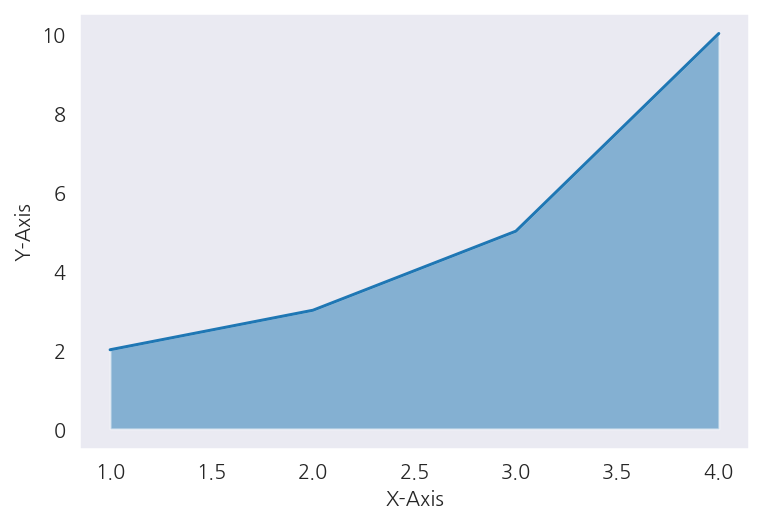

In [ ]:
x = [1, 2, 3, 4]
y = [2, 3, 5, 10]

plt.plot(x, y)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.fill_between(x[0:5], y[0:5], alpha=0.5)

plt.show()

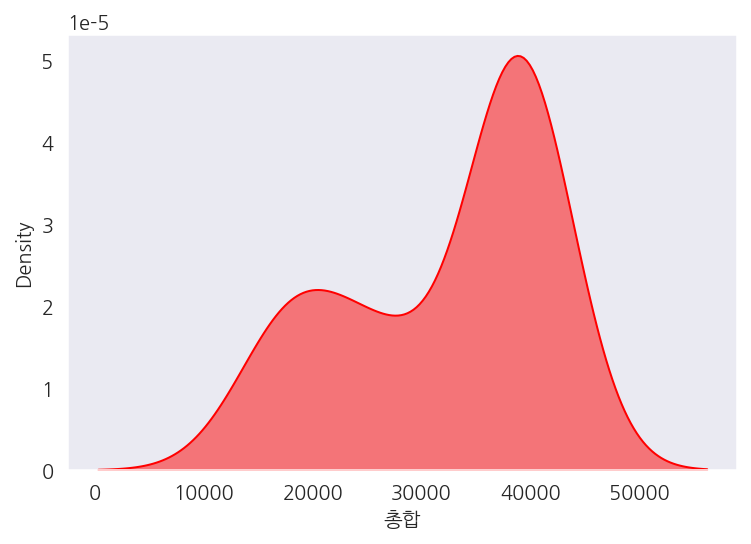

In [ ]:
sns.kdeplot(csv3_1['총합'], shade=True, color='r', alpha = 0.5)

In [ ]:
csv3_g = csv3[csv3['역명'] == '고속터미널']

In [ ]:
csv3_g['총합'] = csv3_g['승차총승객수'] + csv3_g['하차총승객수']

In [ ]:
csv3_g3 = csv3_g[csv3_g['호선명'] == '3호선']
csv3_g7 = csv3_g[csv3_g['호선명'] == '7호선']
csv3_g9 = csv3_g[csv3_g['호선명'] == '9호선']

In [ ]:
csv3_g3

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합
40,20221031,3호선,고속터미널,42015,40727,20221103,82742
645,20221030,3호선,고속터미널,48668,46693,20221102,95361
1250,20221029,3호선,고속터미널,59658,59574,20221101,119232
1858,20221028,3호선,고속터미널,54990,54840,20221031,109830
2467,20221027,3호선,고속터미널,45106,42348,20221030,87454
3072,20221026,3호선,고속터미널,43541,40750,20221029,84291
3677,20221025,3호선,고속터미널,42925,40375,20221028,83300
4284,20221024,3호선,고속터미널,42758,41500,20221027,84258
4889,20221023,3호선,고속터미널,49547,45914,20221026,95461
5494,20221022,3호선,고속터미널,58580,58170,20221025,116750


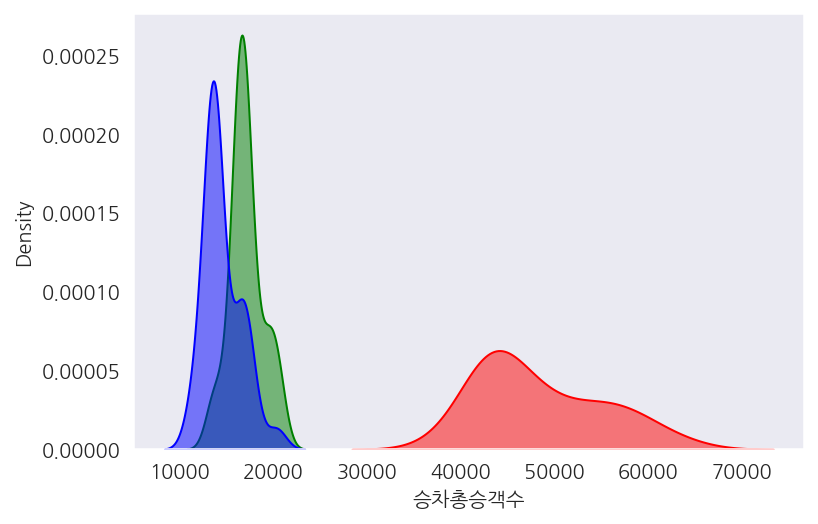

In [ ]:
sns.kdeplot(csv3_g3['승차총승객수'], shade=True, color='r', alpha = 0.5)
sns.kdeplot(csv3_g7['승차총승객수'], shade=True, color='g', alpha = 0.5)
sns.kdeplot(csv3_g9['승차총승객수'], shade=True, color='b', alpha = 0.5)

In [ ]:
csv4 = pd.read_csv('ta_20221109135050.csv', encoding='cp949')

In [ ]:
csv4.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2021-01-01,108.0,-4.2,-9.8,1.6
1,\t2021-01-02,108.0,-5.0,-8.4,-1.4
2,\t2021-01-03,108.0,-5.6,-9.1,-2.0
3,\t2021-01-04,108.0,-3.5,-8.4,0.3
4,\t2021-01-05,108.0,-5.5,-9.9,-2.1


In [ ]:
csv4_1 = csv4[csv4['날짜'].str.contains("2021-01")]
csv4_2 = csv4[csv4['날짜'].str.contains("2021-02")]
csv4_3 = csv4[csv4['날짜'].str.contains("2021-03")]
csv4_4 = csv4[csv4['날짜'].str.contains("2021-04")]
csv4_5 = csv4[csv4['날짜'].str.contains("2021-05")]
csv4_6 = csv4[csv4['날짜'].str.contains("2021-06")]
csv4_7 = csv4[csv4['날짜'].str.contains("2021-07")]
csv4_8 = csv4[csv4['날짜'].str.contains("2021-08")]
csv4_9 = csv4[csv4['날짜'].str.contains("2021-09")]
csv4_10 = csv4[csv4['날짜'].str.contains("2021-10")]
csv4_11 = csv4[csv4['날짜'].str.contains("2021-11")]
csv4_12 = csv4[csv4['날짜'].str.contains("2021-12")]

In [ ]:
month = [[], [], [], [], [] ,[], [], [], [], [], [], []]

month[0] = csv4_1['평균기온(℃)']
month[1] = csv4_2['평균기온(℃)']
month[2] = csv4_3['평균기온(℃)']
month[3] = csv4_4['평균기온(℃)']
month[4] = csv4_5['평균기온(℃)']
month[5] = csv4_6['평균기온(℃)']
month[6] = csv4_7['평균기온(℃)']
month[7] = csv4_8['평균기온(℃)']
month[8] = csv4_9['평균기온(℃)']
month[9] = csv4_10['평균기온(℃)']
month[10] = csv4_11['평균기온(℃)']
month[11] = csv4_12['평균기온(℃)']

<Figure size 720x576 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f297ba96a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f297ba4a590>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f297ba384d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f297b9d0050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f297b9d05d0>,
 'means': []}

Text(0.5, 0, '월\n\n상단 가로 실선 : 최댓값(Q1 + 1.5(Q3 - Q1)\n박스 상단 가로선 : 상위 25%(Q1)\n박스 안 주황색 실선 : 상위 50%(중앙값, Q2)\n박스 하단 가로선 : 상위 75%(Q3)\n하단 가로 실선 : 최솟값(Q3 - 1.5(Q3 - Q1))\n흰색 원 : 범위를 벗어나는 이상치')

Text(0, 0.5, '평균 기온(℃)')

Text(0.5, 1.0, '2021년 서울특별시 일별 평균 기온')

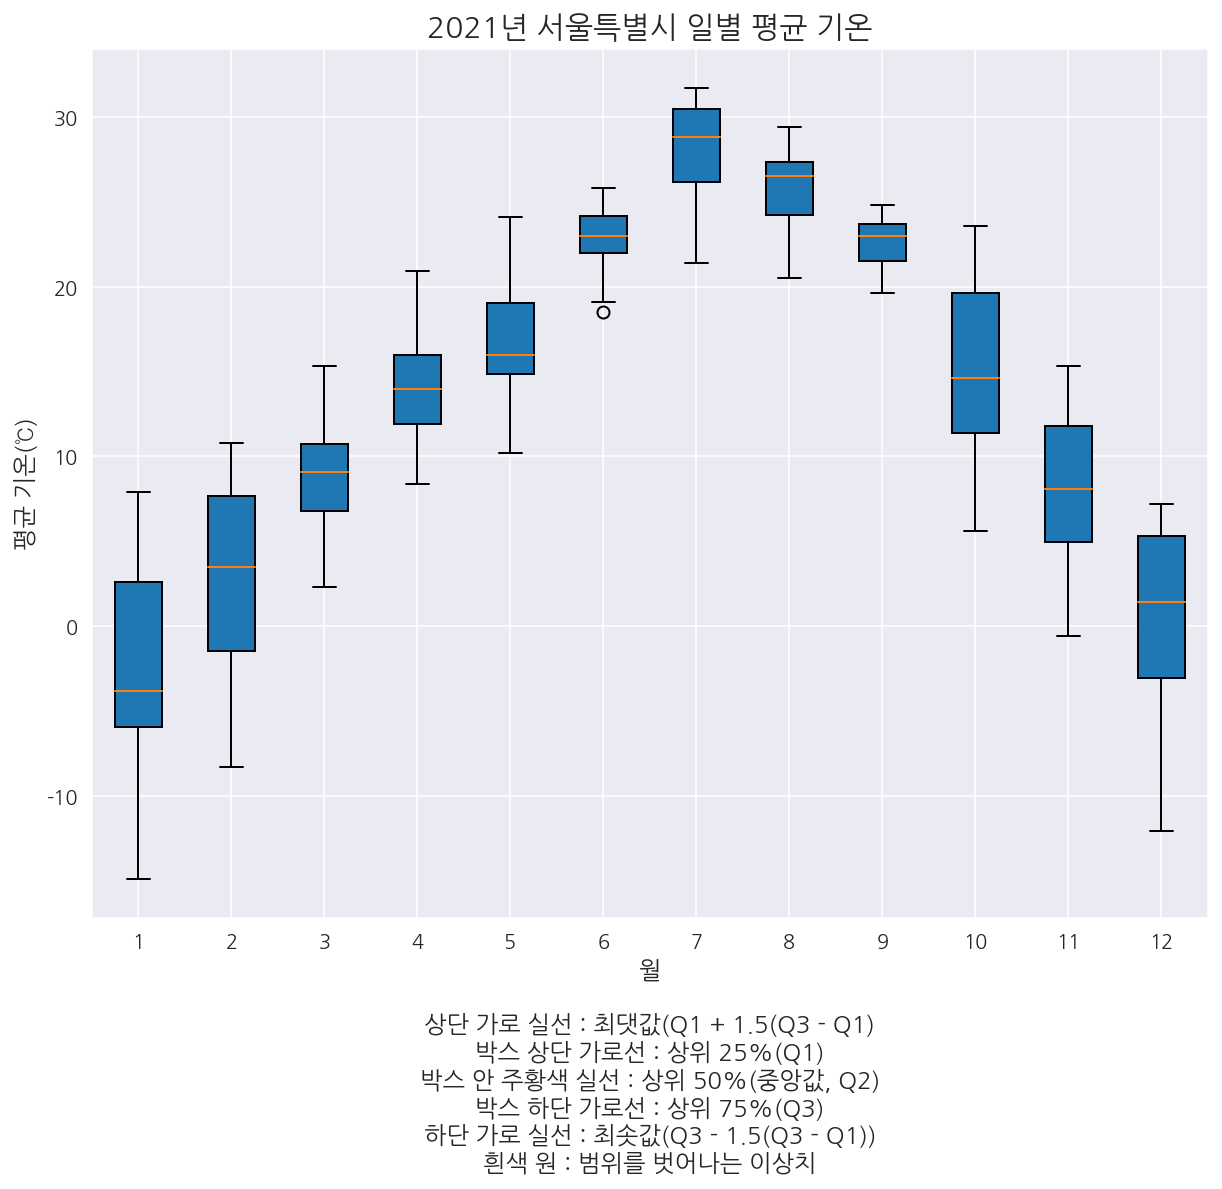

In [ ]:
plt.figure(figsize=(10, 8))
plt.boxplot(month, patch_artist=True)
plt.xlabel('월' + '\n\n' + '상단 가로 실선 : 최댓값(Q1 + 1.5(Q3 - Q1)' + '\n' + '박스 상단 가로선 : 상위 25%(Q1)' + '\n' + '박스 안 주황색 실선 : 상위 50%(중앙값, Q2)' + '\n' +
           '박스 하단 가로선 : 상위 75%(Q3)' + '\n' + '하단 가로 실선 : 최솟값(Q3 - 1.5(Q3 - Q1))' + '\n' + '흰색 원 : 범위를 벗어나는 이상치', fontsize=12)
plt.ylabel('평균 기온(℃)', fontsize=12)
plt.title('2021년 서울특별시 일별 평균 기온', fontsize=15)
plt.grid()
plt.show()

In [ ]:
csv4_1['월'] = '1월'
csv4_2['월'] = '2월'
csv4_3['월'] = '3월'
csv4_4['월'] = '4월'
csv4_5['월'] = '5월'
csv4_6['월'] = '6월'
csv4_7['월'] = '7월'
csv4_8['월'] = '8월'
csv4_9['월'] = '9월'
csv4_10['월'] = '10월'
csv4_11['월'] = '11월'
csv4_12['월'] = '12월'

In [ ]:
csv4_1['월'] = 'Jan'
csv4_2['월'] = 'Feb'
csv4_3['월'] = 'Mar'
csv4_4['월'] = 'Apr'
csv4_5['월'] = 'May'
csv4_6['월'] = 'June'
csv4_7['월'] = 'July'
csv4_8['월'] = 'Aug'
csv4_9['월'] = 'Sep'
csv4_10['월'] = 'Oct'
csv4_11['월'] = 'Nov'
csv4_12['월'] = 'Dec'

In [ ]:
csv4_m = pd.concat([csv4_1, csv4_2, csv4_3, csv4_4, csv4_5, csv4_6, csv4_7, csv4_8, csv4_9, csv4_10, csv4_11, csv4_12])

In [ ]:
csv4_m

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월
0,\t2021-01-01,108.0,-4.2,-9.8,1.6,Jan
1,\t2021-01-02,108.0,-5.0,-8.4,-1.4,Jan
2,\t2021-01-03,108.0,-5.6,-9.1,-2.0,Jan
3,\t2021-01-04,108.0,-3.5,-8.4,0.3,Jan
4,\t2021-01-05,108.0,-5.5,-9.9,-2.1,Jan
...,...,...,...,...,...,...
360,\t2021-12-27,108.0,-7.6,-12.9,-3.9,Dec
361,\t2021-12-28,108.0,-4.1,-8.5,-0.9,Dec
362,\t2021-12-29,108.0,0.4,-3.8,5.9,Dec
363,\t2021-12-30,108.0,-3.9,-6.8,0.2,Dec


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, '2021년 서울특별시 일별 평균 기온')

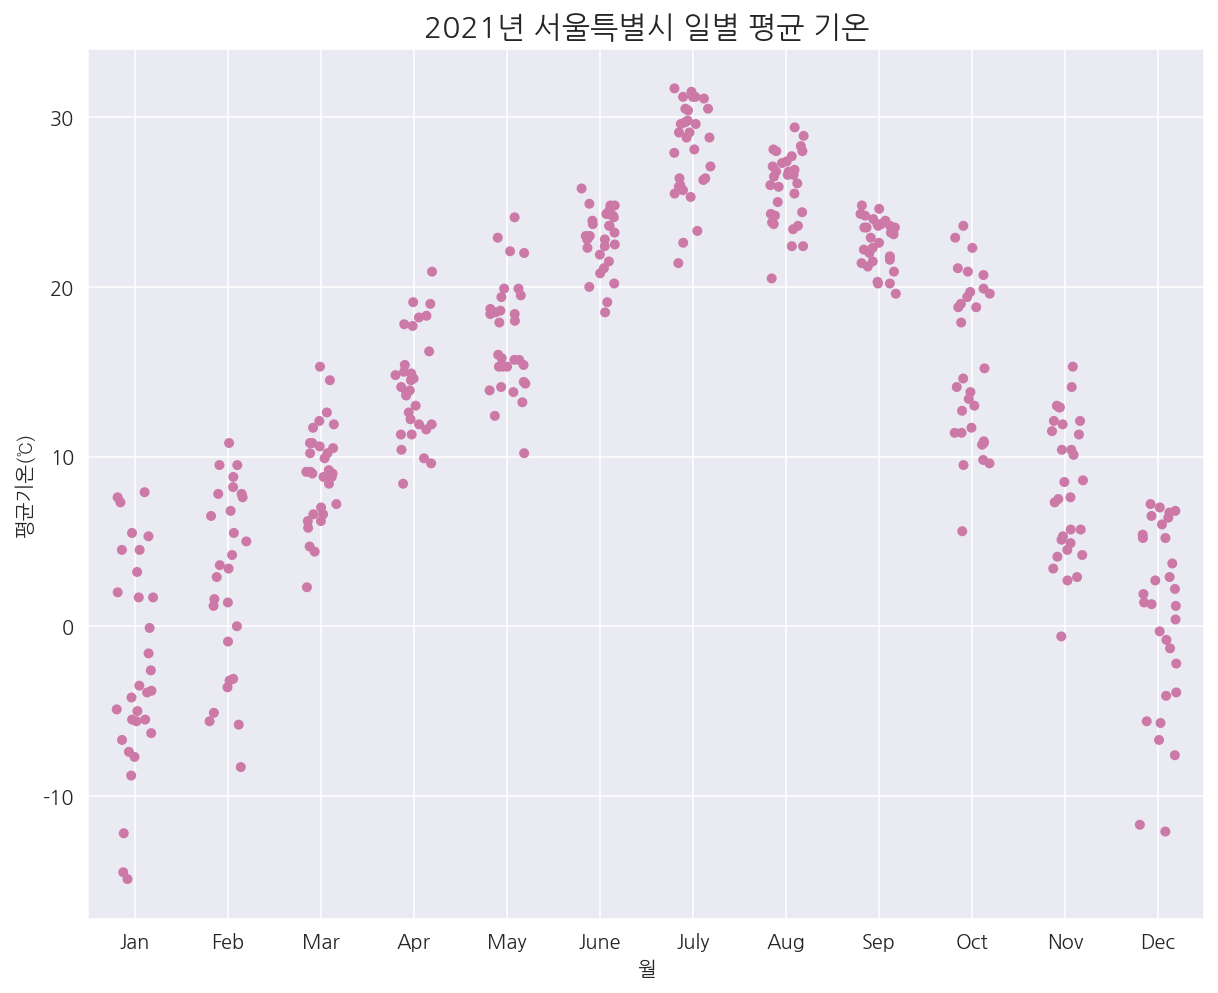

In [ ]:
plt.figure(figsize=(10, 8))
sns.stripplot(data=csv4_m, x='월', y='평균기온(℃)', jitter = 0.2, color='#CC79A7')
plt.title('2021년 서울특별시 일별 평균 기온', fontsize=15)
plt.grid()
plt.show()

In [ ]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
csv4_1['월'] = 1
csv4_2['월'] = 2
csv4_3['월'] = 3
csv4_4['월'] = 4
csv4_5['월'] = 5
csv4_6['월'] = 6
csv4_7['월'] = 7
csv4_8['월'] = 8
csv4_9['월'] = 9
csv4_10['월'] = 10
csv4_11['월'] = 11
csv4_12['월'] = 12

In [ ]:
csv4_m = pd.concat([csv4_1, csv4_2, csv4_3, csv4_4, csv4_5, csv4_6, csv4_7, csv4_8, csv4_9, csv4_10, csv4_11, csv4_12])

In [ ]:
csv4_m

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월
0,\t2021-01-01,108.0,-4.2,-9.8,1.6,1
1,\t2021-01-02,108.0,-5.0,-8.4,-1.4,1
2,\t2021-01-03,108.0,-5.6,-9.1,-2.0,1
3,\t2021-01-04,108.0,-3.5,-8.4,0.3,1
4,\t2021-01-05,108.0,-5.5,-9.9,-2.1,1
...,...,...,...,...,...,...
360,\t2021-12-27,108.0,-7.6,-12.9,-3.9,12
361,\t2021-12-28,108.0,-4.1,-8.5,-0.9,12
362,\t2021-12-29,108.0,0.4,-3.8,5.9,12
363,\t2021-12-30,108.0,-3.9,-6.8,0.2,12


In [ ]:
from joypy import joyplot

(<Figure size 576x432 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f297b880e10>])

Text(0.5, 34.0, '평균기온(℃)')

Text(0.5, 1.0, '2021년 서울특별시 일별 평균 기온')

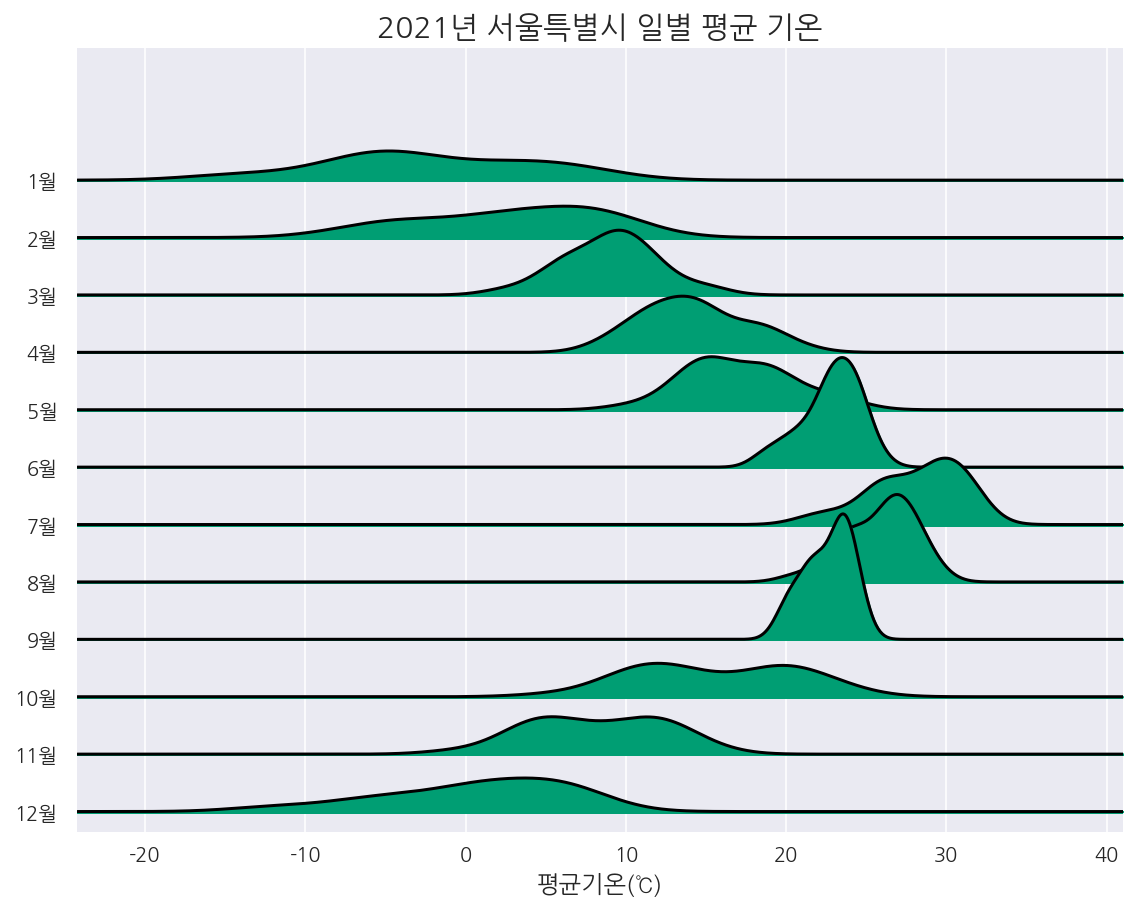

In [ ]:
joyplot(csv4_m, by='월', column='평균기온(℃)', color = '#009E73', fade=False, figsize = (8, 6), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.xlabel('평균기온(℃)', fontsize=12)
plt.title('2021년 서울특별시 일별 평균 기온', fontsize=15)
plt.grid()
plt.show()

In [ ]:
type(csv4_m['월'])

pandas.core.series.Series

([<matplotlib.axis.XTick at 0x7f2975cee7d0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12')])

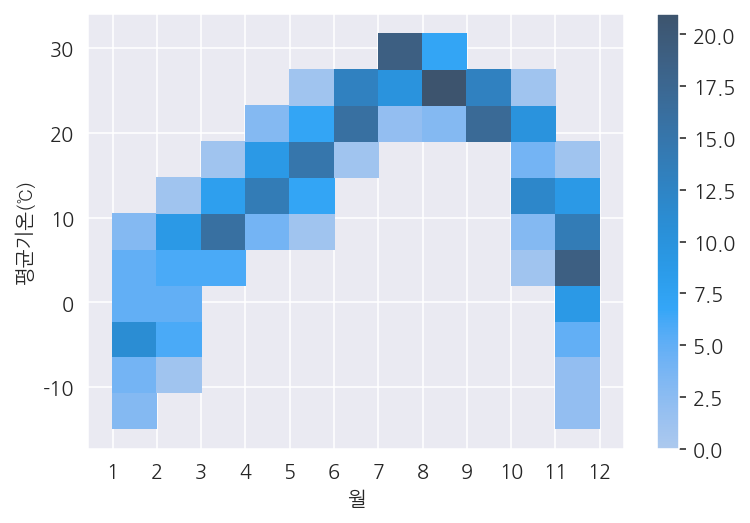

In [ ]:
sns.histplot(x=csv4_m['월'], y=csv4_m['평균기온(℃)'], bins = 11, cbar=True)
plt.xticks(np.arange(1,13), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid()

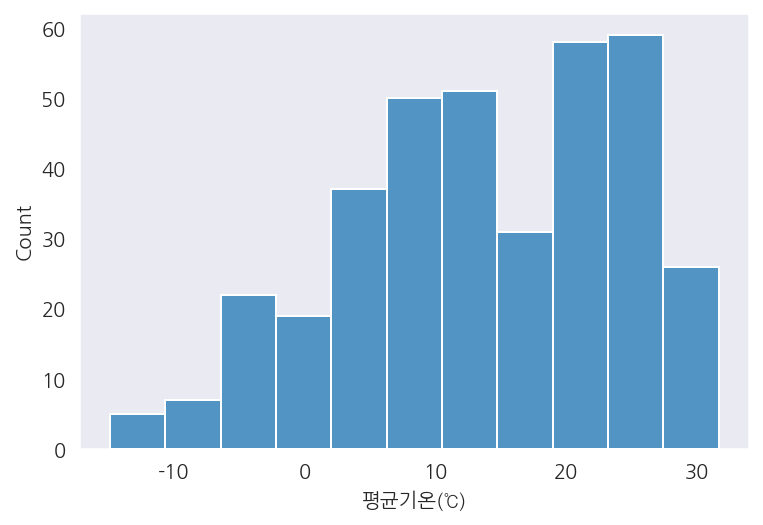

In [ ]:
sns.histplot(x=csv4_m['평균기온(℃)'])

<Figure size 720x576 with 0 Axes>

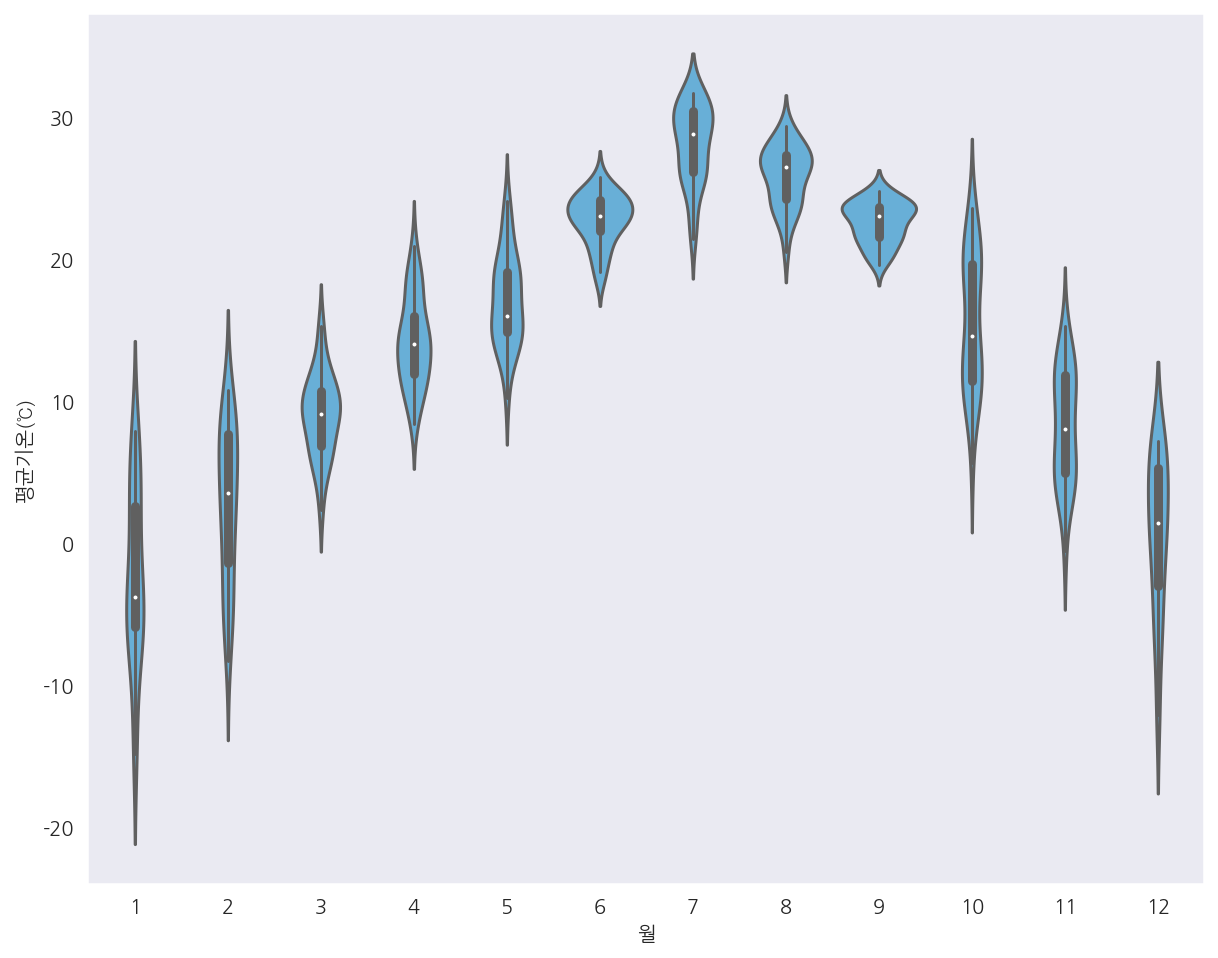

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=csv4_m['월'], y=csv4_m['평균기온(℃)'], color='#56B4E9')

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, '2021년 서울특별시 일별 평균 기온')

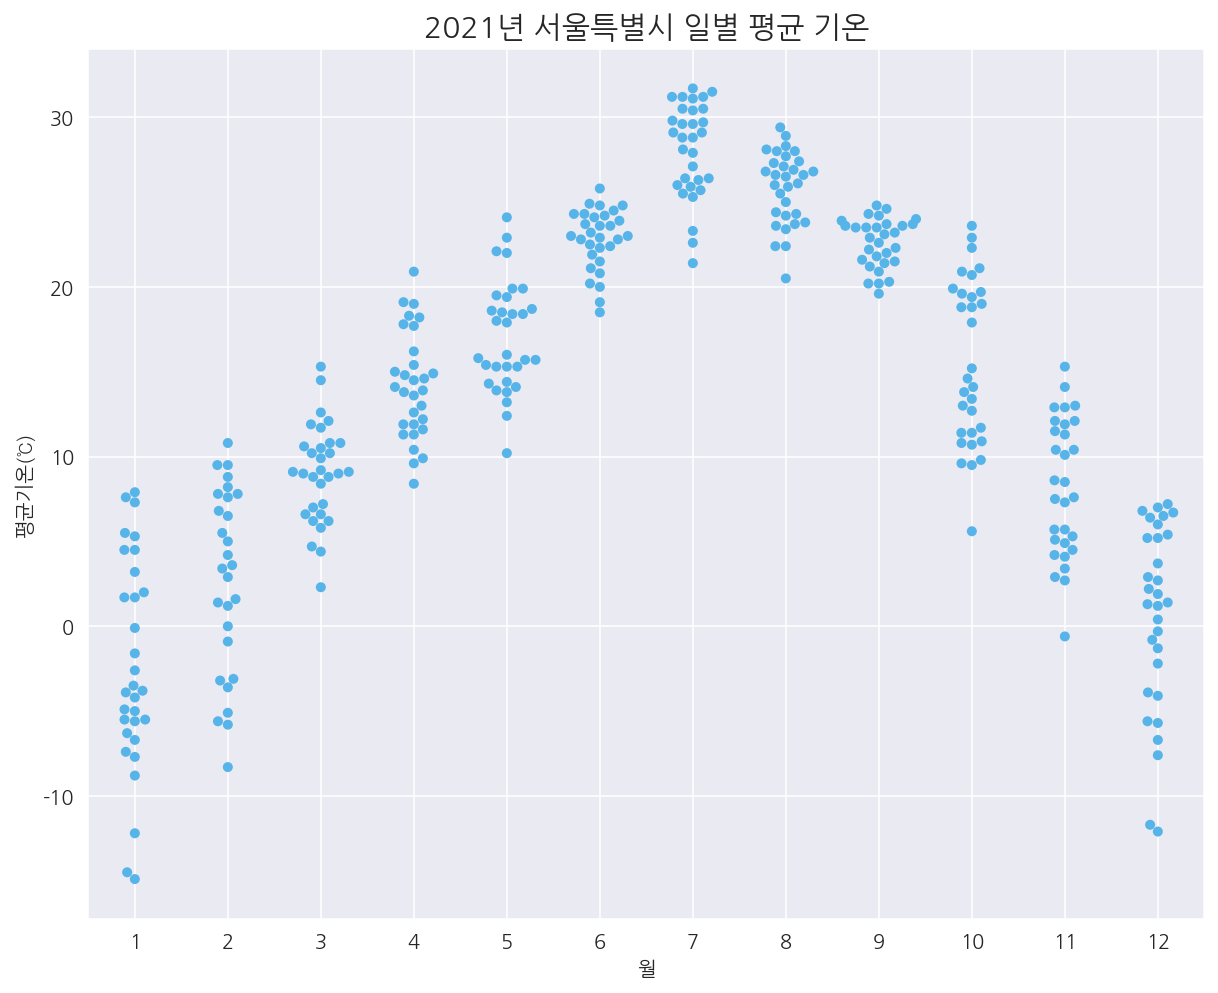

In [ ]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x=csv4_m['월'], y=csv4_m['평균기온(℃)'], color='#56B4E9')
plt.title('2021년 서울특별시 일별 평균 기온', fontsize=15)
plt.grid()

In [ ]:
csv5 = pd.read_csv('서울시 부동산 전월세가 정보.csv', encoding='cp949')

In [ ]:
csv5_j = csv5[csv5['전월세 구분'] == '전세']
csv5_w = csv5[csv5['전월세 구분'] == '월세']

In [ ]:
len(csv5_w)
print('\n')
len(csv5_j)

94872

115123

In [ ]:
csv5_w_o = csv5_w[csv5_w['건물용도'] == '오피스텔']

In [ ]:
csv5_j_a = csv5_j[csv5_j['건물용도'] == '아파트']
csv5_j_o = csv5_j[csv5_j['건물용도'] == '오피스텔']
csv5_j_d = csv5_j[csv5_j['건물용도'] == '단독다가구']

In [ ]:
len(csv5_j_a)
print('\n')
csv5_j_a['보증금(만원)'].idxmax()

27822

5042

In [ ]:
csv5_j_a.loc[5042, :]

접수연도             2022
자치구코드           11215
자치구명              광진구
법정동코드         10500.0
법정동명              자양동
지번구분              1.0
지번구분명              대지
본번              227.0
부번                7.0
층                15.0
계약일          20220512
전월세 구분             전세
임대면적(㎡)        163.53
보증금(만원)        230000
임대료(만원)             0
건물명            더샵스타시티
건축년도           2007.0
건물용도              아파트
계약기간              NaN
신규갱신여부            NaN
계약갱신권사용여부         NaN
종전 보증금            NaN
종전 임대료            NaN
Name: 5042, dtype: object

In [ ]:
csv5_w_o['임대료(만원)'].idxmax()
csv5_w_o.loc[7238, :]

7238

접수연도                2022
자치구코드              11215
자치구명                 광진구
법정동코드            10900.0
법정동명                 군자동
지번구분                 1.0
지번구분명                 대지
본번                 473.0
부번                   1.0
층                   16.0
계약일             20220406
전월세 구분                월세
임대면적(㎡)             18.1
보증금(만원)             4000
임대료(만원)              431
건물명              (473-1)
건축년도              2019.0
건물용도                오피스텔
계약기간         22.04~24.04
신규갱신여부                신규
계약갱신권사용여부            NaN
종전 보증금               0.0
종전 임대료               0.0
Name: 7238, dtype: object

(array([9.760e+02, 3.737e+03, 2.540e+02, 2.100e+01, 9.000e+00, 7.000e+00,
        1.500e+01, 3.000e+00, 2.000e+00, 5.000e+00]),
 array([  2. ,  44.9,  87.8, 130.7, 173.6, 216.5, 259.4, 302.3, 345.2,
        388.1, 431. ]),
 <a list of 10 Patch objects>)

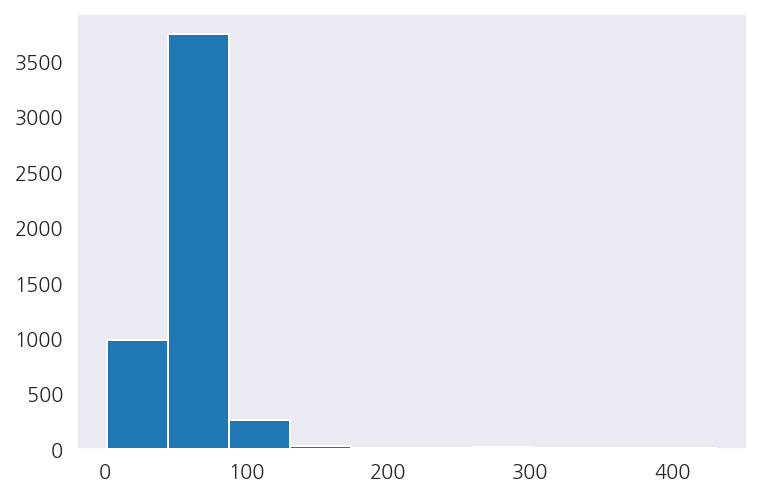

In [ ]:
plt.hist(csv5_w_o['임대료(만원)'])
plt.show()

(array([2.6900e+03, 1.4885e+04, 7.5840e+03, 1.7750e+03, 5.8300e+02,
        2.0000e+02, 7.6000e+01, 1.8000e+01, 9.0000e+00, 2.0000e+00]),
 array([  1600.,  24440.,  47280.,  70120.,  92960., 115800., 138640.,
        161480., 184320., 207160., 230000.]),
 <a list of 10 Patch objects>)

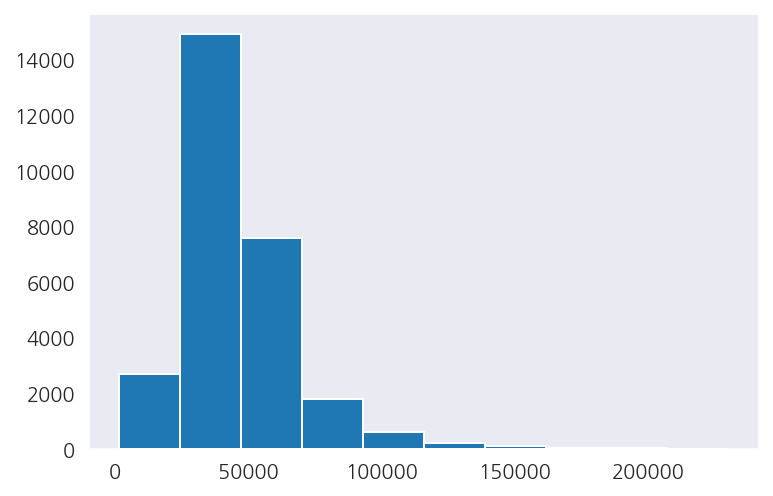

In [ ]:
plt.hist(csv5_j_a['보증금(만원)'], bins = 10)
plt.show()

(array([1542., 1428.,   91.,   28.,   28.,   19.,    8.,    7.,    3.,
           2.]),
 array([  1000.,  16900.,  32800.,  48700.,  64600.,  80500.,  96400.,
        112300., 128200., 144100., 160000.]),
 <a list of 10 Patch objects>)

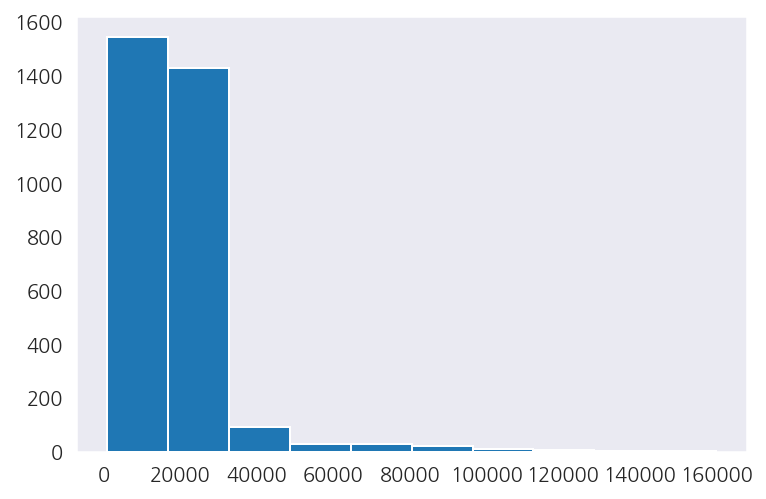

In [ ]:
plt.hist(csv5_j_o['보증금(만원)'])
plt.show()

(array([3.0874e+04, 1.8059e+04, 2.1940e+03, 1.3200e+02, 1.5000e+01,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([   300.,  12270.,  24240.,  36210.,  48180.,  60150.,  72120.,
         84090.,  96060., 108030., 120000.]),
 <a list of 10 Patch objects>)

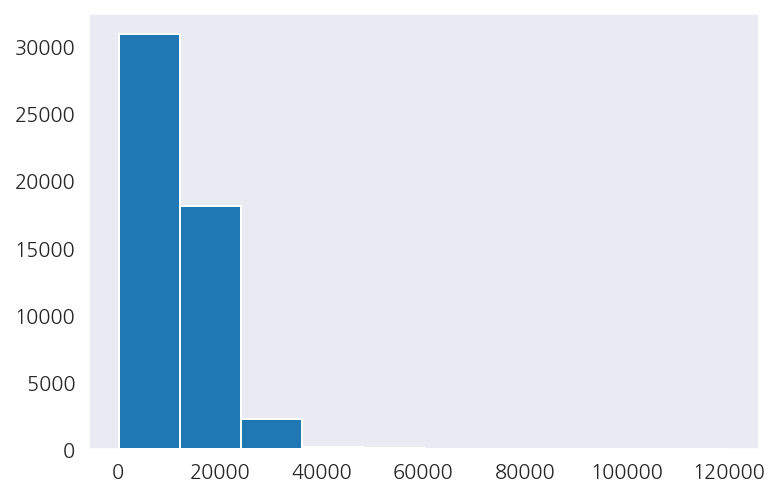

In [ ]:
plt.hist(csv5_j_d['보증금(만원)'])
plt.show()

In [ ]:
csv5_j['법정동명'].unique()

array(['자양동', '중곡동', '광장동', '구의동', '군자동', '화양동', '능동', nan], dtype=object)

In [ ]:
csv5_jy = csv5_j[(csv5_j['법정동명'] == '자양동') & (csv5_j['건물용도'] == '아파트')]
csv5_jg = csv5_j[(csv5_j['법정동명'] == '중곡동') & (csv5_j['건물용도'] == '아파트')]
csv5_ge = csv5_j[(csv5_j['법정동명'] == '구의동') & (csv5_j['건물용도'] == '아파트')]
csv5_hy = csv5_j[(csv5_j['법정동명'] == '화양동') & (csv5_j['건물용도'] == '아파트')]
csv5_gj = csv5_j[(csv5_j['법정동명'] == '광장동') & (csv5_j['건물용도'] == '아파트')]
csv5_n = csv5_j[(csv5_j['법정동명'] == '능동') & (csv5_j['건물용도'] == '아파트')]
csv5_gz = csv5_j[(csv5_j['법정동명'] == '군자동') & (csv5_j['건물용도'] == '아파트')]

In [ ]:
len(csv5_hy)
print('\n')
len(csv5_gz)
print('\n')
len(csv5_n)
print('\n')
len(csv5_gj)
print('\n')
len(csv5_jg)
print('\n')
len(csv5_ge)
print('\n')

484

476

22

8544

728

6125

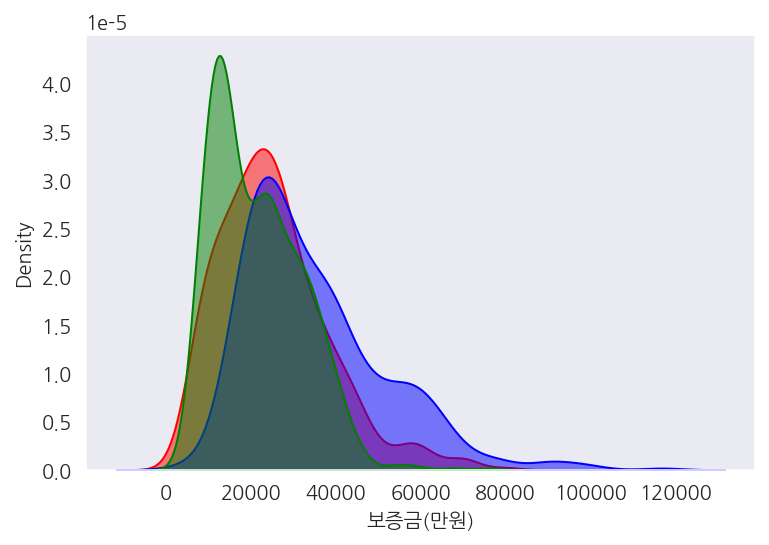

In [ ]:
sns.kdeplot(csv5_hy['보증금(만원)'], shade=True, color='r', alpha = 0.5)
sns.kdeplot(csv5_gz['보증금(만원)'], shade=True, color='b', alpha = 0.5)
sns.kdeplot(csv5_jg['보증금(만원)'], shade=True, color='g', alpha = 0.5)